## 과제 0829

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%precision 3
%matplotlib inline

### 과제 1
P173-180 예제 풀어보세요

### 과제 2
P181-187 예제 풀어보세요(colab 이용)

### 과제 3
미분, 적분 공부한 후 미적분 관계를 설명해보세요

## 과제 0830


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
 # 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수   
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

###  과제 1
p192 - 199 예제 풀어보세요(colab 이용)

### 과제 2
- 상기 누적분포함수를 그래프로 출력하세요.
- 확률변수가 4일때 누적분포값(확률)
- 확률이 0.5일때 확률변수를 구하세요

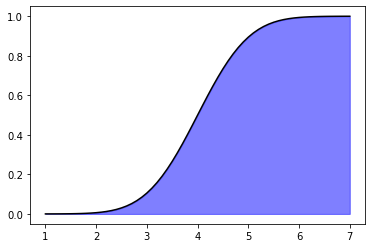

In [16]:
# x:1 ~ 7.1, 평균 4, 표준편차0.8인 누적분포함수 곡선을 출력
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=4, scale=0.8),color='black')
plt.fill_between(x_plot, stats.norm.cdf(x_plot, loc=4,scale=0.8), alpha=0.5, color='b')

In [8]:
#확률 변수 생성
rv = stats.norm(4,0.8)
rv.cdf(4)

0.500

In [9]:
rv.ppf(0.5)

4.000

### 과제 3
- 상위 5% 확률의 확률변수를 구하세요
- 하위 5% 확률의 확률변수를 구하세요

In [10]:
rv.isf(0.05), rv.isf(0.95)

(5.316, 2.684)

In [ ]:
# 상위5% 확률변수
stats.norm.isf(0.05, loc=4, scale=0.8)
# 하위 5% 확률변수
stats.norm.isf(0.95, loc=4, scale=0.8)

### 과제 4
1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오 

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오 

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오


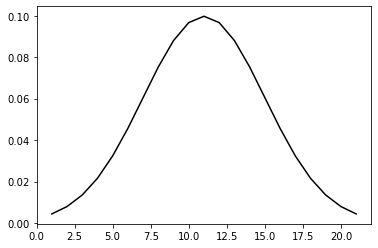

In [14]:
# x:1 ~ 22, 평균 11, 표준편차4인 정규분포함수 곡선을 출력
x_plot = np.arange(1, 22, 1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=11, scale=4),color='black')

In [44]:
# 14년 이상 근무한 종업원의 비율
rv1 = stats.norm(11,4)
1-rv1.cdf(14)

0.227

In [42]:
rv1.sf(14)

0.227

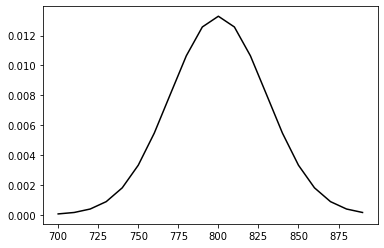

In [33]:
# 평균 800일, 표준편차 30일 정규분포 
x_plot2 = np.arange(700,900,10)
plt.plot(x_plot2, stats.norm.pdf(x=x_plot2, loc=800, scale=30),color='black')

In [34]:
rv2 = stats.norm(800,30)
rv2.cdf(760)

0.091

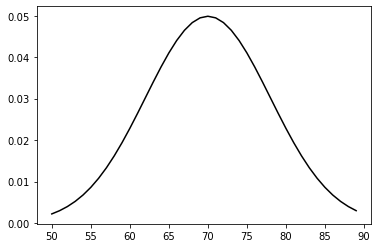

In [49]:
#평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 
#그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오
x_plot3 = np.arange(50,90,1)
plt.plot(x_plot3,stats.norm.pdf(x=x_plot3, loc=70, scale=8),color='black')

In [53]:
rv3 = stats.norm(70,np.sqrt(64))
rv3.sf(80)-rv3.sf(90) #80점 이상 - 90점이상

0.099

## 과제 0831

### 과제 0831_1
상기 지수분포에서 lambda를 1, 2, 3으로 변환시켰읅 때 그래프의 변화 모습을 출력하고 의미를 설명하세요

### 과제_0831_2
p219-223 예제 코드로 작성하세요

### 과제 0831_3
p224 ~ 228 예제 코드로 작성하세요.

### 과제 0831_4
p229 ~ 232 예제 코드로 작성하세요.

## 과제 0901_1

### 과제 0901_1
p243-250

### 과제 0901_2
p251-260

### 과제 0901_3
중심극한정리와 대수의 법칙을 사례를 들어 설명하세요.

In [3]:
import pandas as pd
!pip install html5lib

In [13]:
df = pd.read_html('https://st.scrdairy.com/5.3.2.90/#/reports/9')


ImportError: html5lib not found, please install it